<a href="https://colab.research.google.com/github/Sebastian-Cely/M1-Procesamiento-datos-secuenciales/blob/main/ModelAudio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/Sebastian-Cely/M1-Procesamiento-datos-secuenciales.git

Cloning into 'M1-Procesamiento-datos-secuenciales'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 139 (delta 9), reused 0 (delta 0), pack-reused 122
Receiving objects: 100% (139/139), 2.72 MiB | 6.85 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [15]:
#Importar librerías
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt


**Cargar Datos**

In [12]:
def load_file(file_aud):
    # Cargar archivo con extensión .wav
    file_ext = tf.io.read_file(file_aud)
    # Decodificación wav
    wav, sample_rate = tf.audio.decode_wav(file_ext, desired_channels=1)
    # Removiendo eje final
    wav = tf.squeeze(wav, axis=-1)
    # Devolver archivo como vector numpy
    return wav


**Leer archivos de Audio**

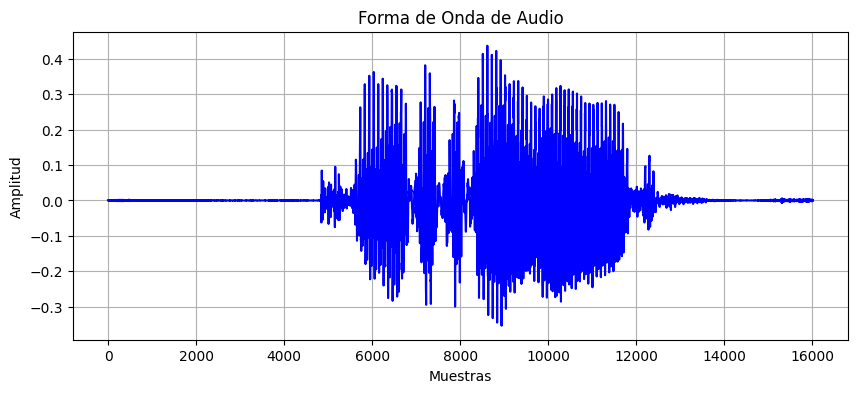

In [16]:
import matplotlib.pyplot as plt

# Definición de ruta para archivos de audio
PATH = "/content/M1-Procesamiento-datos-secuenciales/data/audio/corriendo-jd7.wav"

# Cargar el archivo de audio
wave = load_file(PATH)

# Crear el gráfico
plt.figure(figsize=(10, 4))  # Tamaño de la figura
plt.plot(wave, color='blue')  # Graficar la forma de onda de audio
plt.title('Forma de Onda de Audio')  # Título del gráfico
plt.xlabel('Muestras')  # Etiqueta del eje x
plt.ylabel('Amplitud')  # Etiqueta del eje y
plt.grid(True)  # Mostrar cuadrícula
plt.show()  # Mostrar el gráfico


In [29]:
def plot_spectrogram(waveform, sample_rate=16000):

    # Aplica el recorte a la forma de onda de audio
    waveform = waveform[:16000]

    # Calcula el espectrograma
    spectrogram = librosa.feature.melspectrogram(y=waveform, sr=sample_rate)

    # Convertir el espectrograma a decibeles
    log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

    # Mostrar el espectrograma
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_spectrogram, sr=sample_rate, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Espectrograma de Audio')
    plt.xlabel('Tiempo (segundos)')
    plt.ylabel('Frecuencia (Hz)')
    plt.show()

    return log_spectrogram


In [42]:
def plot_spectrogram(waveform, sample_rate=16000):

    # Recorte a la forma de onda de audio
    waveform = waveform[:16000]

    # Calcular el espectrograma
    spectrogram = librosa.feature.melspectrogram(y=waveform, sr=sample_rate)

    # Convertir el espectrograma a decibeles
    log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

    return log_spectrogram

# Definición de forma de onda de audio de ejemplo
waveform = np.random.rand(16000)  # Forma de onda aleatoria de 16000 puntos

# Llamar a la función plot_spectrogram para generar el espectrograma
spectrogram_example = plot_spectrogram(waveform)

# Imprimir las formas de onda y espectrograma
print("Waveform shape:", waveform.shape)
print("Spectrogram shape:", spectrogram_example.shape)


Waveform shape: (16000,)
Spectrogram shape: (128, 32)


In [43]:
def plot_spectrogram(waveform, sample_rate=16000):

    # Aplicar el recorte a la forma de onda de audio
    waveform = waveform[:16000]

    # Calcular el espectrograma
    spectrogram = librosa.feature.melspectrogram(y=waveform, sr=sample_rate)

    # Convertir el espectrograma a decibeles
    log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

    return log_spectrogram

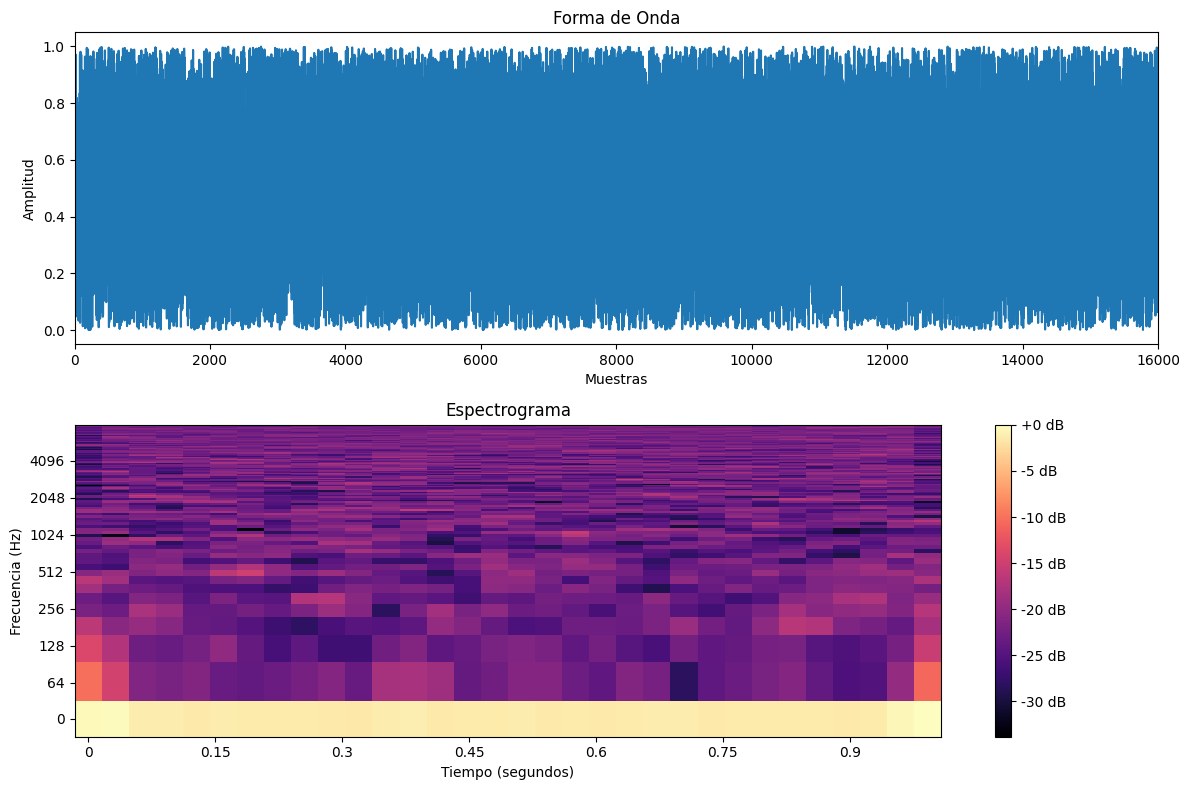

In [40]:
fig, axes = plt.subplots(2, figsize=(12, 8))

# Se establece la escala temporal en periodos fijos
timescale = np.arange(waveform.shape[0])

# Configuración del primer subplot para la forma de onda
axes[0].plot(timescale, waveform)
axes[0].set_title('Forma de Onda')
axes[0].set_xlim([0, 16000])
axes[0].set_xlabel('Muestras')
axes[0].set_ylabel('Amplitud')

# Configuración del segundo subplot para el espectrograma
specshow_obj = librosa.display.specshow(spectrogram_example, sr=sample_rate, x_axis='time', y_axis='log', ax=axes[1])
plt.colorbar(specshow_obj, format='%+2.0f dB', ax=axes[1])
axes[1].set_title('Espectrograma')
axes[1].set_xlabel('Tiempo (segundos)')
axes[1].set_ylabel('Frecuencia (Hz)')

# Ajusta el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()
